<a href="https://colab.research.google.com/github/Saniyashaikh1505/Machine-Learning-Projects/blob/main/P6_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Preprocessing

In [51]:
car_data = pd.read_csv('/content/drive/MyDrive/Data Analysis Portfolio - Saniya Shaikh/Machine Learning Projects - Python/Python Data File/car_data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [53]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Getting some information about the Dataset

In [54]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Checking the Distribution of the Categorical Data

In [55]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the Categorical Data

In [56]:
#Encoding Fuel_Type column
car_data.replace({'Fuel_Type' : {'Petrol' : 0 ,'Diesel' : 1 , 'CNG' : 2}}, inplace = True)

#Encoding Seller column
car_data.replace({'Seller_Type' : {'Dealer' : 0 ,'Individual' : 1}}, inplace = True)

#Encoding Transmisison column
car_data.replace({'Transmission' : {'Manual' : 0 ,'Automatic' : 1}}, inplace = True)

car_data.head()

/tmp/ipython-input-56-3994234137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type' : {'Petrol' : 0 ,'Diesel' : 1 , 'CNG' : 2}}, inplace = True)
/tmp/ipython-input-56-3994234137.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type' : {'Dealer' : 0 ,'Individual' : 1}}, inplace = True)
/tmp/ipython-input-56-3994234137.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Spliting the Data and Target

In [57]:
X = car_data.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_data['Selling_Price']

print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

# Spliting training and Test Data

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 2)

# 1. Model Training Linear Regression

In [59]:
lin_model= LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [60]:
#Prediction on Training Data
training_data_prediction = lin_model.predict(X_train)

# R squared Error

Error_square = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : " , Error_square)

R Squared Error :  0.8838169193709796


# Visualize the Actual price and Predicted price

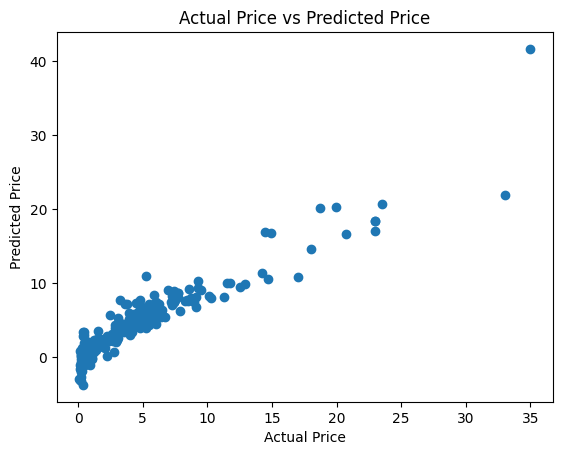

In [61]:
#Visulization on Training Data

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [62]:
#Prediction on Test Data
test_data_prediction = lin_model.predict(X_test)

# R squared Error

Error_square = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : " , Error_square)

R Squared Error :  0.8401532365377697


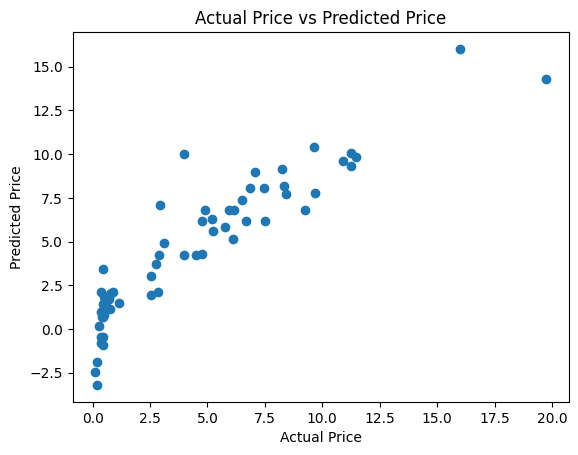

In [63]:
#Visulization on Test Data

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# 2. Model Training - Lasso Regression



In [64]:
Lasso_model = Lasso()
Lasso_model.fit(X_train,Y_train)

Lasso()

In [65]:
#Prediction on Training Data
training_Lasso_prediction = Lasso_model.predict(X_train)

In [66]:
#R Squared Error

Error_square = metrics.r2_score(Y_train,training_Lasso_prediction)
print("R Squared Error : " , Error_square)

R Squared Error :  0.843587395258283


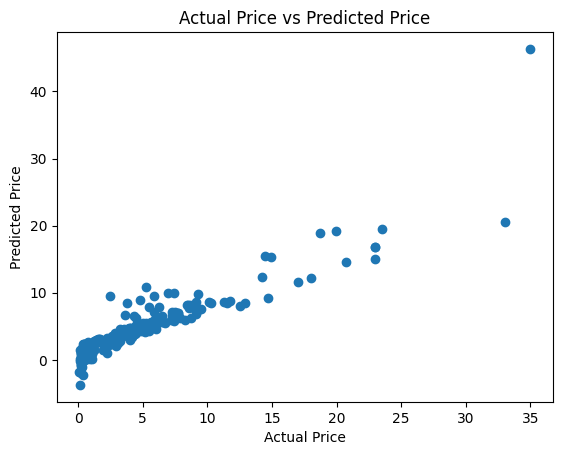

In [67]:
#Visulization on Training Data

plt.scatter(Y_train,training_Lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [68]:
#Predicting on Test Data
test_Lasso_prediction = Lasso_model.predict(X_test)

In [69]:
#R Squared Error

Error_square = metrics.r2_score(Y_test,test_Lasso_prediction)
print("R Squared Error : " , Error_square)

R Squared Error :  0.8497457570738539


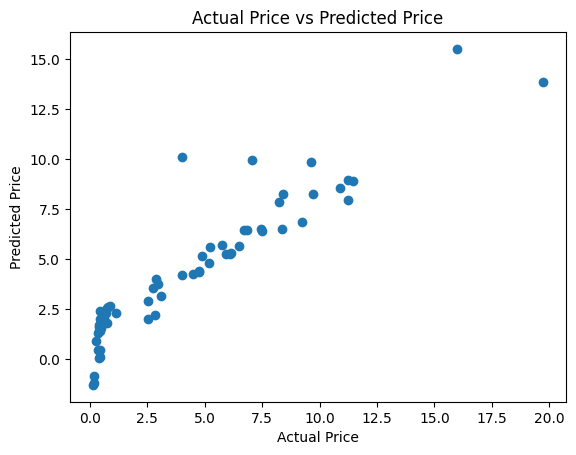

In [70]:
#Visulization on Test Data

plt.scatter(Y_test,test_Lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()